# Nama : M. Taufik

# Nim : 09011281823073

# Kelas : SK 5 B Inderalaya

# TUGAS UAS KECERDASAN BUATAN

# Klasifikasi jenis bunga menggunakan metode Linear Suport Vector Machine 

# source : https://github.com/rohan1320/linear_svm

Support Vector Machine (SVM) merupakan salah satu metode dalam supervised learning yang biasanya digunakan untuk klasifikasi (seperti Support Vector Classification) dan regresi (Support Vector Regression). Dalam pemodelan klasifikasi, SVM memiliki konsep yang lebih matang dan lebih jelas secara matematis dibandingkan dengan teknik-teknik klasifikasi lainnya. SVM juga dapat mengatasi masalah klasifikasi dan regresi dengan linear maupun non linear.

Disini saya memakai metode Linear Support Vector Machine guna mengkelompokan Jenis bunga iris berdasarkan ciri ciri yang diinputkan dari inputan dataset yang terlampir pada program-program dibawah. 
Adapun pengklasifikasian dari jenis Bunga Iris tersebut. Disini terdapat 3 jenis flora Bunga Iris yaitu Iris setosa, iris versicolor, dan iris virginica yang mana ketiganya memiliki ciri ciri yang berbeda satu sama lain sehingga bisa diklasifikasikan setiap jenis bunga iris sesuai ciri cirinya masing masing.


## Data Exploration and Preparation (Import jenis" library yang digunakan)

Selain import data berupa Numpy( library Python yang fokus pada scientific computing.)
Pandas( sebuah open source python package/library yang menyediakan banyak perkakas untuk kebutuhan data analisis, manipulasi dan pembersihan data. )
Matlotlib(librari plotting 2D Python yang menghasilkan gambar ) seperti dibawah . Saya juga menginstall Python 3.7, tencorflow, Python Keras pada command prom anaconda.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_iris = pd.read_csv('Iris.csv')
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df_iris['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [4]:
iris_setosa = df_iris.iloc[: 50, :]
iris_versicolor = df_iris.iloc[50: 100, :]
iris_virginica = df_iris.iloc[100: , :]

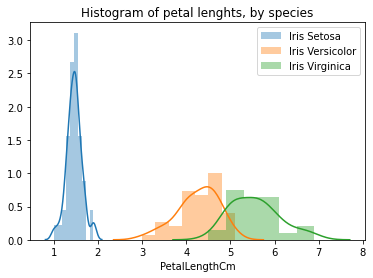

In [5]:
sns.distplot(a = iris_setosa['PetalLengthCm'], label = 'Iris Setosa')
sns.distplot(a = iris_versicolor['PetalLengthCm'], label = 'Iris Versicolor')
sns.distplot(a = iris_virginica['PetalLengthCm'], label = 'Iris Virginica')
plt.title('Histogram of petal lenghts, by species')
plt.legend()

In [6]:
df = df_iris.iloc[: 100, 2: 4]
df.head()

,SepalWidthCm,PetalLengthCm
0,3.5,1.4
1,3.0,1.4
2,3.2,1.3
3,3.1,1.5
4,3.6,1.4


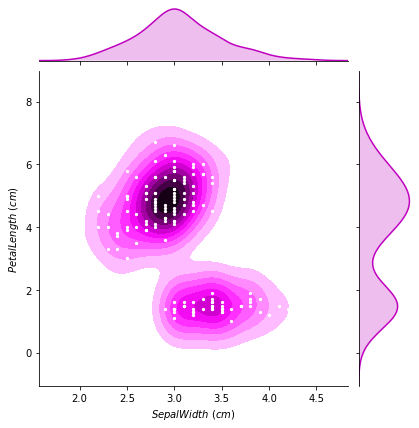

In [7]:
g = sns.jointplot(x = 'SepalWidthCm', y = 'PetalLengthCm', data = df_iris, kind = 'kde', color = 'm')
g.plot_joint(plt.scatter, c = 'w', linewidth = 1, s = 5)
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$SepalWidth$ $(cm)$", "$PetalLength$ $(cm)$")

In [8]:
X = df.to_numpy()

In [9]:
y = df_iris.iloc[: 100, -1]

In [10]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)

In [11]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [13]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
model_fit = svc.fit(X_train, y_train)

In [14]:
decision_function = model_fit.decision_function(X_train)
support_vector_indices = np.where((2 * y_train - 1) * decision_function <= 1)[0]
support_vectors = X_train[support_vector_indices]

In [15]:
support_vectors

array([[2.3, 1.3],
       [3.3, 1.7],
       [3.2, 1.6],
       [2.5, 3. ],
       [3. , 1.6],
       [2.9, 3.6]])

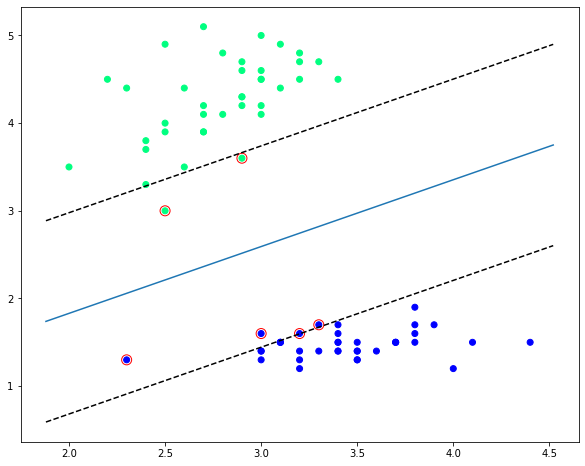

In [16]:
plt.figure(figsize = (10, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = 'winter')
ax = plt.gca()
xlim = ax.get_xlim()
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - svc.intercept_[0] / w[1]
plt.plot(xx, yy)
yy = a * xx - (svc.intercept_[0] - 1) / w[1]
plt.plot(xx, yy, 'k--')
yy = a * xx - (svc.intercept_[0] + 1) / w[1]
plt.plot(xx, yy, 'k--')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s = 100, linewidth = 1, facecolors = 'none',
             edgecolors = 'r')

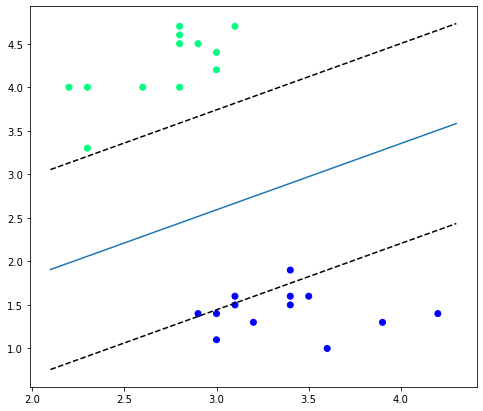

In [17]:
plt.figure(figsize = (8, 7))
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, cmap = 'winter')
ax = plt.gca()
xlim = ax.get_xlim()
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - svc.intercept_[0] / w[1]
plt.plot(xx, yy)
yy = a * xx - (svc.intercept_[0] - 1) / w[1]
plt.plot(xx, yy, 'k--')
yy = a * xx - (svc.intercept_[0] + 1) / w[1]
plt.plot(xx, yy, 'k--')


In [18]:
y_preds = svc.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_preds)

In [20]:
cm

array([[13,  0],
       [ 0, 12]], dtype=int64)